# Run full example

# 1. Train a new model

In [24]:
from Source import TrainModels

#
# Training Configuration
# 
# add here the different training configs to train different models
# (note this is a toy training example to test the training process, the parameters used are different from those used in the paper!)
trainingSetup = [
    {'csvfile': "Datasets/toy_1000_trp.csv", 'outputFile': 'Models/toy_w4_f10_e100_d200', 'w':4, 'minf': 10, 'epochs':50 ,'ndim':200}  
]

#
# Run the training process
#
for setup in trainingSetup:
    print('Print setup ', setup)
    TrainModels.TrainModel(setup['csvfile'], 
       'body\r',
       outputname = setup['outputFile'],
       window = setup['w'],
       minf = setup['minf'],
       epochs = setup['epochs'],
       ndim = setup['ndim'],
       encoding = "ISO-8859-1" #change encoding to default utf-8 for other csvs
       )

Print setup  {'csvfile': 'Datasets/toy_1000_trp.csv', 'outputFile': 'Models/toy_w4_f5_e100_d200', 'w': 4, 'minf': 5, 'epochs': 50, 'ndim': 200}
], output Models/toy_w4_f5_e100_d200, window 4, minf 5, epochs 50, ndim 200


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


total rows 999999
	...processing line 0
	...processing line 500000
Done reading and preprocessing data file Datasets/toy_1000_trp.csv 
-> Output will be saved in Models/toy_w4_f5_e100_d200
->->Starting training model Models/toy_w4_f5_e100_d200 with dimensions:200, minf:5, epochs:50
->-> Model saved in Models/toy_w4_f5_e100_d200
-> Model creation ended in 215.05064010620117 seconds


# 2. Discover biases

In [28]:
import sys
sys.path.insert(0,'Source/')
import DADDBias

# attribute concepts for r/trp
female=["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
male=["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"] 

#
# Configuration.
# Since the dataset is very small, here we use a smaller stdev to obtain more biased words
#
allconfigs = [
    {'modelfile': 'Models/toy_w4_f10_e100_d200',  'output': 'Models/', 'name': 'toy_w4_f10_e100_d200_bias',
     'stdev':3, 't1': female, 't2': male, 'repeatk':40, 'mink':20, 'maxk':50  }
]

#
# Run the discovery of biases
#
for config in allconfigs:
    print('>>starting with config', config)
    obj = DADDBias.DADDBias(config['modelfile'], config['output'], config['name'])
    print('>>calculating bias')
    obj.CalculateBiasedWords(config['t1'], config['t2'], config['stdev'] )
    print('>>clustering')
    obj.Clustering(repeateachclustering = config['repeatk'], forcekmin= config['mink'], forcekmax = config['maxk'])
    print('>>usas labels')
    obj.USASLabels()
    path = obj.Save()
    print(">DADDObject saved in ",path)

>>starting with config {'modelfile': 'Models/toy_w4_f5_e100_d200', 'output': 'Models/', 'name': 'toy_w4_f5_e100_d200_bias', 'stdev': 3, 't1': ['sister', 'female', 'woman', 'girl', 'daughter', 'she', 'hers', 'her'], 't2': ['brother', 'male', 'man', 'boy', 'son', 'he', 'his', 'him'], 'repeatk': 20, 'mink': 20, 'maxk': 50}
>>calculating bias
>>clustering
Exploring  20  clusters...
Exploring  21  clusters...
Exploring  22  clusters...
Exploring  23  clusters...
Exploring  24  clusters...
Exploring  25  clusters...
Exploring  26  clusters...
Exploring  27  clusters...
Exploring  28  clusters...
Exploring  29  clusters...
Exploring  30  clusters...
Exploring  31  clusters...
Exploring  32  clusters...
Exploring  33  clusters...
Exploring  34  clusters...
Exploring  35  clusters...
Exploring  36  clusters...
Exploring  37  clusters...
Exploring  38  clusters...
Exploring  39  clusters...
Exploring  40  clusters...
Exploring  41  clusters...
Exploring  42  clusters...
Exploring  43  clusters..

# 3. Categorise and Rank Conceptual Biases

### 3.1 Load the DADDobject model 

In [50]:
from importlib import reload
import DADDBias
reload(DADDBias)
from Misc import FigureCreator
reload(FigureCreator)

#load DADDbias object we just created
savedfile = 'Models//toy_w4_f10_e100_d200_bias_bias.True_cluster.True_USAS.True.json'
test = DADDBias.DADDBias()
test.Load(savedfile)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 3.2 Discovered biased words towards attribute sets women and men

In [48]:
print('Total select words biased towards women:', len(test.b1_dict))
print('showing 5 words...')
for k,v in list(test.b1_dict.items())[:5]:
    print(k, '\t (salience ', test.b1_dict[k]['sal'], ')')
    
print()
print('Total select words biased towards men:', len(test.b2_dict))
print('showing 5 words...')
for k,v in list(test.b2_dict.items())[:5]:
    print(k, '\t (salience ', test.b2_dict[k]['sal'], ')')



Total select words biased towards women: 112
showing 5 words...
someone 	 (salience  0.923430979603683 )
event 	 (salience  0.8849396083548173 )
activity 	 (salience  0.8728048249739052 )
shes 	 (salience  0.871440925428109 )
prom 	 (salience  0.8690768623124212 )

Total select words biased towards men: 102
showing 5 words...
hes 	 (salience  0.7512589093802672 )
int 	 (salience  0.5841083252734172 )
douche 	 (salience  0.5675135156243678 )
gay 	 (salience  0.5536293533230904 )
jerk 	 (salience  0.543114455833653 )


### 3.3 Conceptual biases

In [49]:
print('Total conceptual clusters for women: ',len(test.clusters1))
print('showing 5 clusters...')
for k in test.clusters1[:5]:
    print(k)
print()
print('Total conceptual clusters for men: ',len(test.clusters2))
print('showing 5 clusters...')
for k in test.clusters2[:5]:
    print(k)
    
    


Total conceptual clusters for women:  45
showing 5 clusters...
['event', 'activity', 'outing']
['stranger', 'strangers']
['coffee', 'lunch', 'dinner', 'drink', 'drinks']
['topic']
['someone', 'somebody', 'anyone']

Total conceptual clusters for men:  37
showing 5 clusters...
['int']
['hes', 'op', 'lol', 'fucking', 'porn', 'sigh', 'overall', 'bc', 'nope', 'eh', 'swear', 'outta', 'sweetie', 'honey', 'adore', 'dear', 'aw', 'blocked', 'cuz', 'heh', 'mans', 'ah', 'tho', 'nut', 'dun', 'yep', 'haha', 'bro', 'lacked', 'freakin', 'sooo']
['douche', 'jerk']
['letting']
['expected', 'expect', 'owe']


### 3.4 Summary figures (general and detailed cluster view)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


conceptual clusters for women:  45
conceptual clusters for men:  37


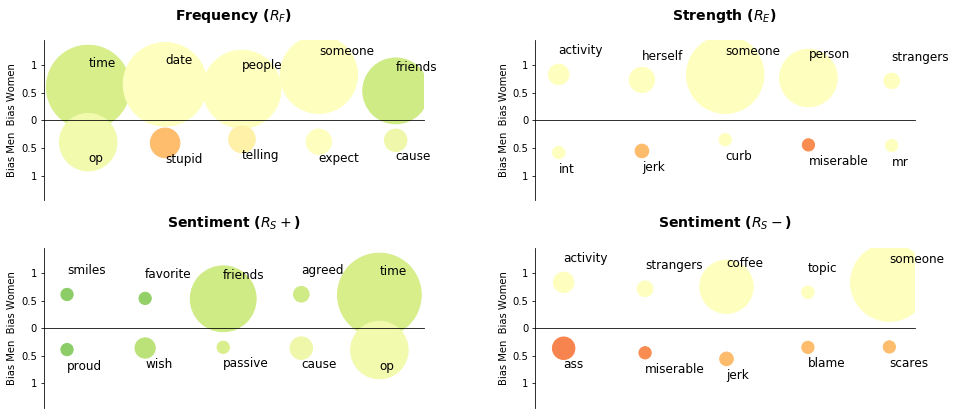

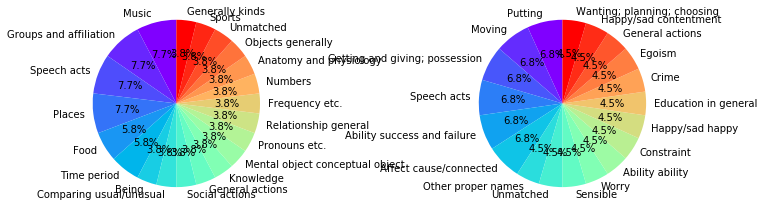

In [31]:
#Show rankings ignoring same stem words in order to provide examples from different families in the
#reported rankings (since we only show the top5 in the paper figure due to space limitations).
#Also the `FigureCreator.CreateLinearPlot` accepts as many clusters as possible, and it can be configured to 
#show the results in different rows and columns (see its code). 
c1l = [];c2l = []
dgdata = ['frequency', 'bias', 'sentiment_pos', 'sentiment']
for data in dgdata:
    [r1, r2] = test.GetClusterRanking(data)
    c1l.append( r1[:5] )
    c2l.append( r2[:5] )

#create the detailed rankings
labels = ['frequency ($R_{f}$) ', 'strength ($R_{e}$) ', 'sentiment ($R_{s}+$)', 'sentiment ($R_{s}-$)']
FigureCreator.CreateLinearPlot(c1l,c2l,labels, 'Women', 'Men', filterplurals = True)
print()

#Create the pies. Show a pie figure exploring the distribution of semantic categories among the clusters, ignoring these 
#less frequent semantic labels and untagged clusters
FigureCreator.GeneratePie(test.clusters1_dict, test.clusters2_dict, percentthreshold=1, labelcolors = None, ignoreUnmatched=False)   